In [1]:
## ex4 : flow - induced phase separation of active colloids at a wall
    
%matplotlib inline
import pystokes 
import numpy as np, matplotlib.pyplot as plt

In [2]:
# particle radius, self-propulsion speed, number and fluid viscosity
b, vs, N, eta = 1.0, 1.0, 128, 0.1

#initialise
r = pystokes.utils.initialCondition(N)  # initial random distribution of positions
p = np.zeros(3*N); p[2*N:3*N] = -1    # initial orientation of the colloids

In [3]:
def rhs(rp):
    """
    right hand side of the rigid body motion equation
    rp: is the array of position and orientations of the colloids
    returns the \dot{rp} so that rp can be updated using an integrator
    orientations are not evolved in this example
    """
    # assign fresh values at each time step
    r = rp[0:3*N];   p = rp[3*N:6*N]
    F, v, o = np.zeros(3*N), np.zeros(3*N), np.zeros(3*N)
    
    force.lennardJonesWall(F, r, lje=0.01, ljr=5, wlje=1.2, wljr=3.4)
    rbm.mobilityTT(v, r, F)    
    
    V1s = vs*p;  V3t=0.6*V1s;
    rbm.propulsionT3t(v, r, V3t);    v = v + V1s
    return np.concatenate( (v,o) )

## Crystallization at a plane no-slip wall

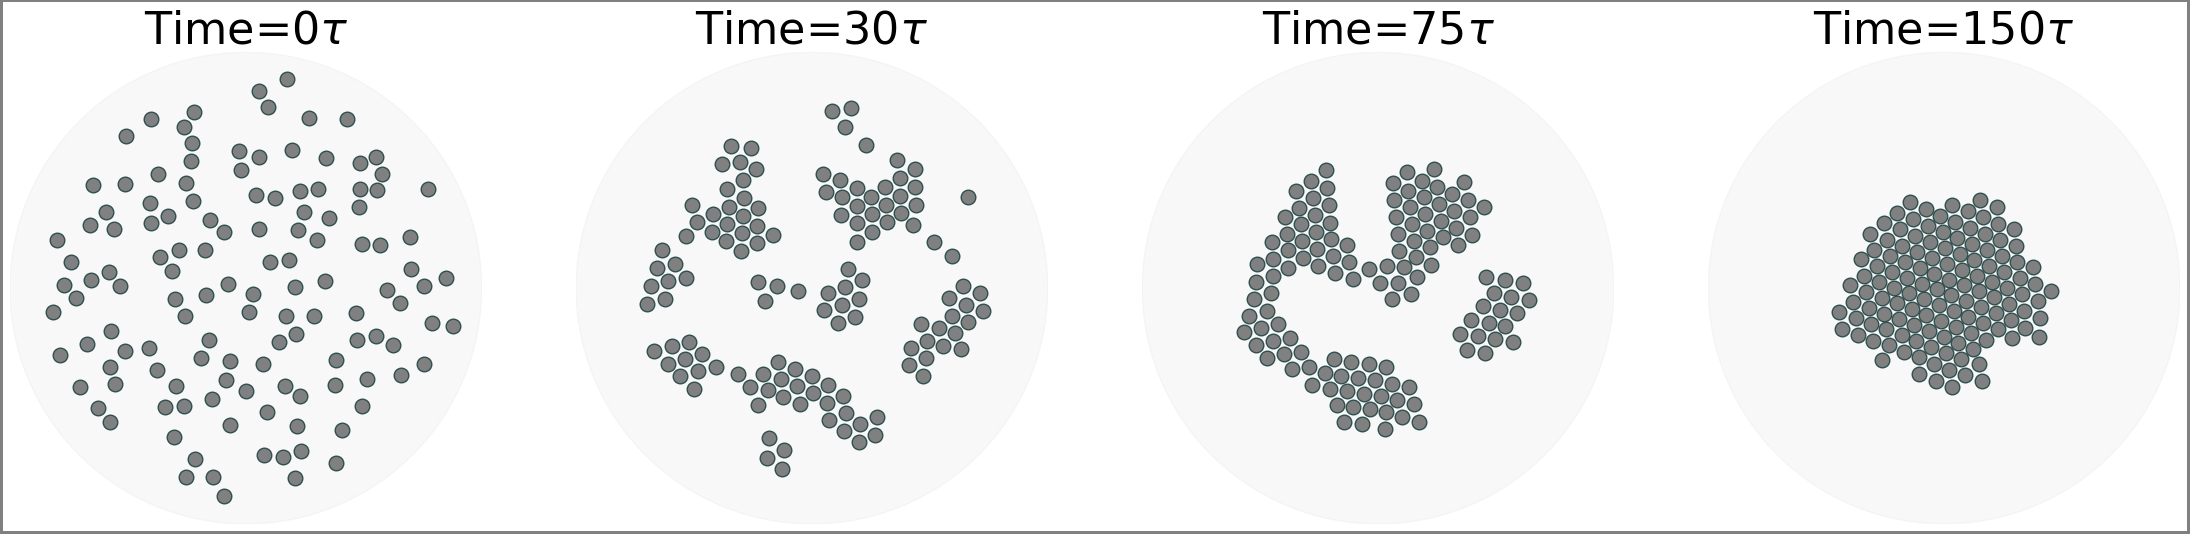

In [4]:
rbm   = pystokes.wallBounded.Rbm(radius=b, particles=N, viscosity=eta)
force = pystokes.forceFields.Forces(particles=N)

# simulate the resulting system
Tf, Nts = 150, 200
pystokes.utils.simulate(np.concatenate((r,p)), Tf,Nts,rhs,integrator='odeint', filename='crystallization')

# plot the data at specific time instants
pystokes.utils.plotConfigs(t=[1, 40, 100, 200], ms=110, tau=(Tf/Nts)/(b/vs), filename='crystallization')

## Crystallization at a plane no-shear interface

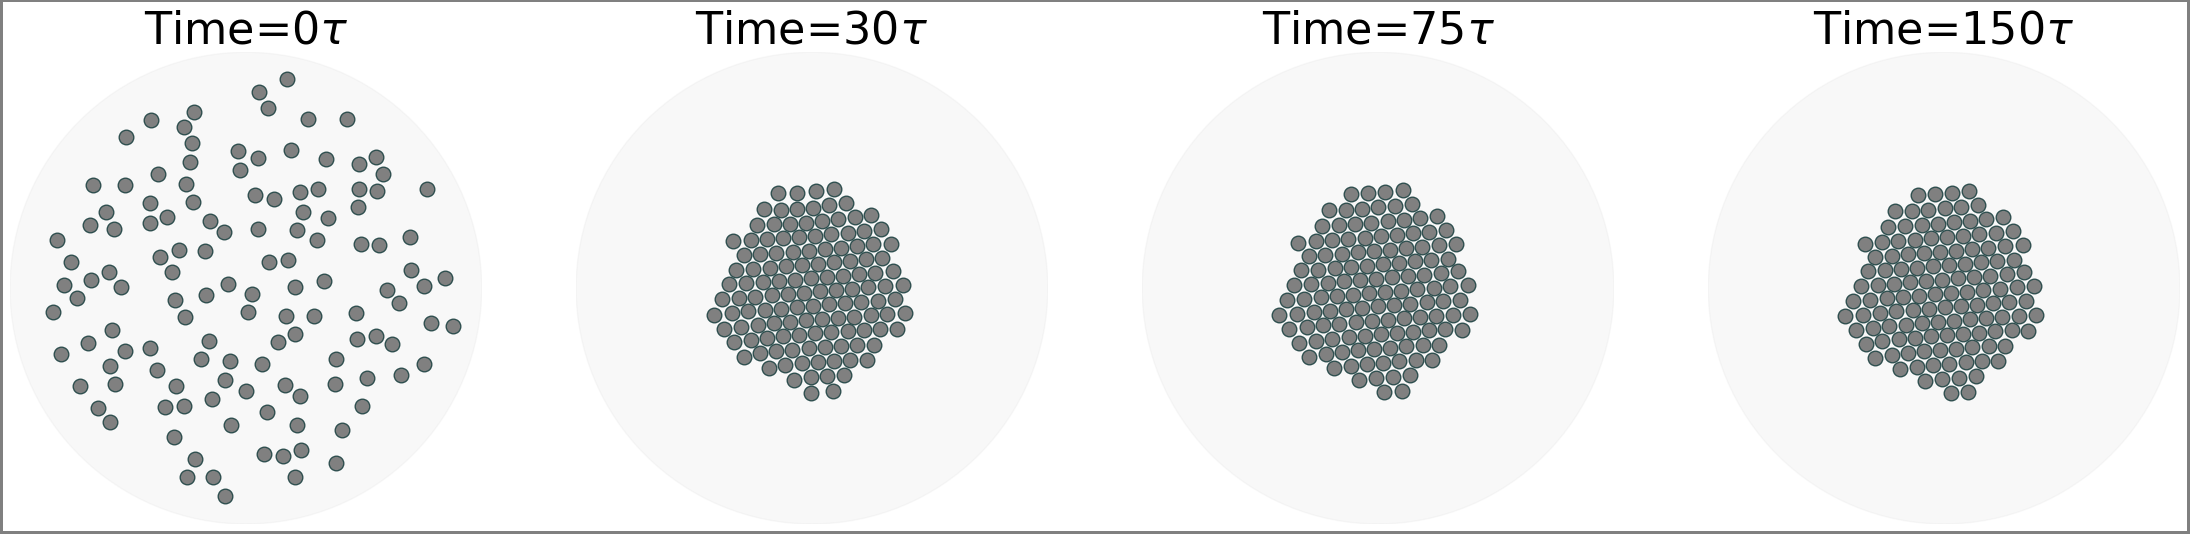

In [5]:
rbm = pystokes.interface.Rbm(radius=b, particles=N, viscosity=eta)

force = pystokes.forceFields.Forces(particles=N)

# simulate the resulting system
Tf, Nts = 150, 200
pystokes.utils.simulate(np.concatenate((r,p)), Tf,Nts,rhs,integrator='odeint', filename='crystallization')

# plot the data at specific time instants
pystokes.utils.plotConfigs(t=[1, 40, 100, 200], ms=110, tau=(Tf/Nts)/(b/vs), filename='crystallization')